# Classifier Masza vs Rysia

### import tf

In [1]:
import tensorflow as tf

is gpu avaiable test

In [2]:
TF_CPP_MIN_LOG_LEVEL=2

In [3]:
gpu_available = tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-08-27 14:11:31.421055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-27 14:11:31.620569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:31.685203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:31.685610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [4]:
gpu_available

True

other way

In [5]:
tf.config.list_physical_devices('GPU')

2022-08-27 14:11:32.670595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.671222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.671673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2022-08-27 14:11:32.685787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.686192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.686613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.687166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.687179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 148766743398826298
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3621126144
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15752514260507982256
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:32.687618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 3453 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


### import dependencies

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [8]:
data_dir = "./koty/"
data_dir = pathlib.Path(data_dir)

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

80


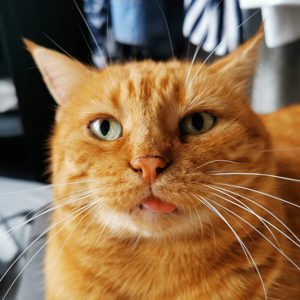

In [10]:
newsize = (300, 300)
masza = list(data_dir.glob('masza/*'))
PIL.Image.open(str(masza[0])).resize(newsize)

^ this is my beautiful cat Masza

## training set

In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 2 classes.
Using 64 files for training.


2022-08-27 14:11:33.472447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:33.473016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:33.473339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:33.473816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 14:11:33.473829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 2 classes.
Using 16 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['masza', 'rysia']


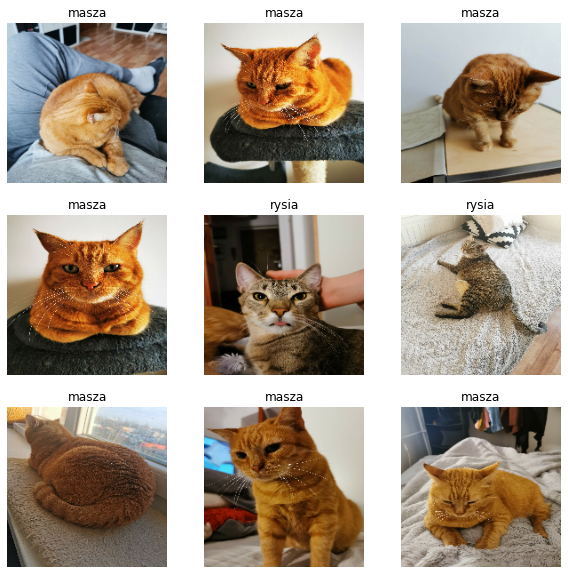

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))


0.0 0.9333334


In [17]:
num_classes = len(class_names)
num_classes

2

In [18]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-08-27 14:11:38.032607: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-27 14:11:39.210990: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-27 14:11:39.607079: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 5s 424ms/step - loss: 0.7041 - accuracy: 0.6250 - val_loss: 3.2215 - val_accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 0s 40ms/step - loss: 1.3482 - accuracy: 0.6719 - val_loss: 0.7974 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 41ms/step - loss: 0.8790 - accuracy: 0.4531 - val_loss: 0.6277 - val_accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 0s 42ms/step - loss: 0.5447 - accuracy: 0.7656 - val_loss: 0.7899 - val_accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 54ms/step - loss: 0.4908 - accuracy: 0.6719 - val_loss: 0.6414 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: 0.3621 - accuracy: 0.9375 - val_loss: 0.5815 - val_accuracy: 0.6875
Epoch 7/10
2/2 [==============================] - 0s 40ms/step - loss: 0.2611 - accuracy: 0.9375 - val_loss: 0.7487 - val_accuracy: 0.6250
Epoch 8/10
2/2 [=====================

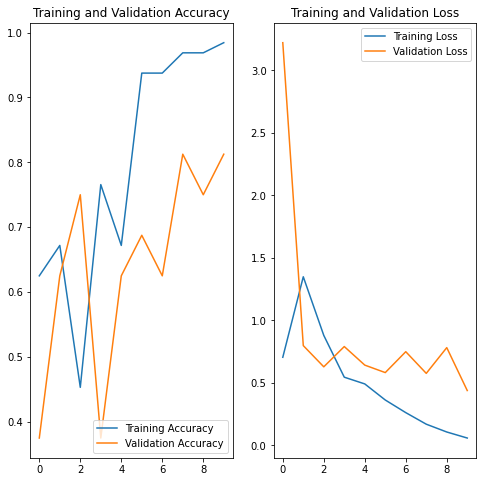

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

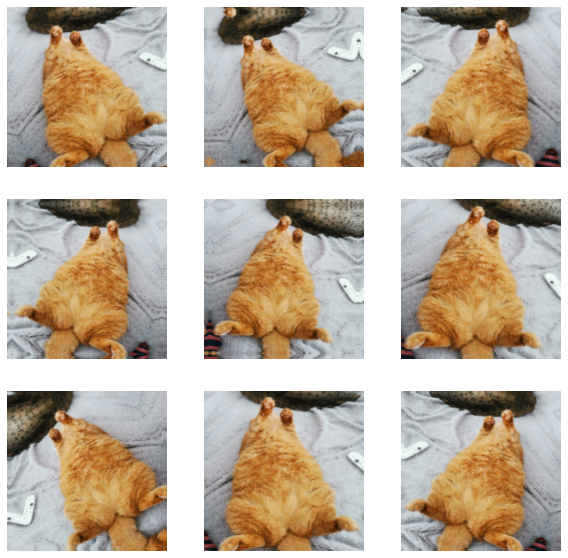

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [25]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
2/2 [==============================] - 1s 199ms/step - loss: 0.6908 - accuracy: 0.5156 - val_loss: 3.1236 - val_accuracy: 0.6250
Epoch 2/15
2/2 [==============================] - 0s 107ms/step - loss: 2.9429 - accuracy: 0.4531 - val_loss: 0.9718 - val_accuracy: 0.3750
Epoch 3/15
2/2 [==============================] - 0s 83ms/step - loss: 0.8314 - accuracy: 0.5469 - val_loss: 1.0271 - val_accuracy: 0.3750
Epoch 4/15
2/2 [==============================] - 0s 75ms/step - loss: 0.7949 - accuracy: 0.5469 - val_loss: 0.8200 - val_accuracy: 0.3750
Epoch 5/15
2/2 [==============================] - 0s 80ms/step - loss: 0.7048 - accuracy: 0.5469 - val_loss: 0.7443 - val_accuracy: 0.3750
Epoch 6/15
2/2 [==============================] - 0s 73ms/step - loss: 0.6800 - accuracy: 0.5469 - val_loss: 0.7175 - val_accuracy: 0.3750
Epoch 7/15
2/2 [==============================] - 0s 70ms/step - loss: 0.6652 - accuracy: 0.5469 - val_loss: 0.7244 - val_accuracy: 0.3750
Epoch 8/15
2/2 [=========

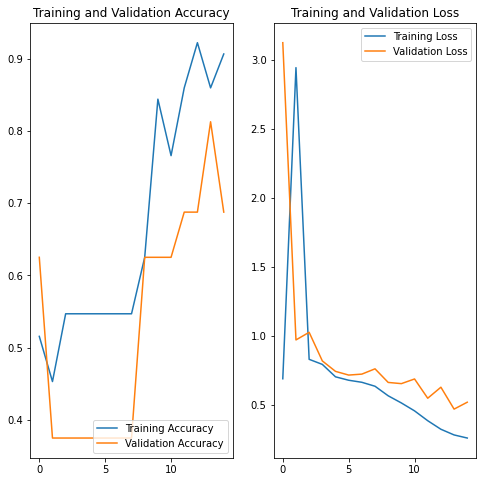

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
koty_nowe = pathlib.Path("./koty_nowe/")
masza_nowe = list(koty_nowe.glob('masza*'))
rysia_nowe = list(koty_nowe.glob('rysia*'))
print(rysia_nowe, masza_nowe)

[PosixPath('koty_nowe/rysia2.jpg'), PosixPath('koty_nowe/rysia1.jpg')] [PosixPath('koty_nowe/masza2.jpg'), PosixPath('koty_nowe/masza1.jpg')]


In [31]:
rysia_nowe[0]

PosixPath('koty_nowe/rysia2.jpg')

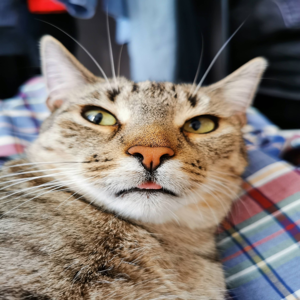

In [32]:
newsize = (300, 300)
PIL.Image.open(str(rysia_nowe[0])).resize(newsize)

In [33]:
img = tf.keras.utils.load_img(
    str(rysia_nowe[0]), target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 142ms/step


In [34]:
print(
    "this picture presents `{}` with a `{:.2f}` percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

this picture presents `masza` with a `51.26` percent confidence.


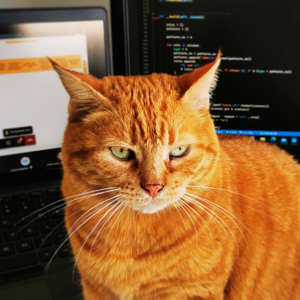

In [35]:
newsize = (300, 300)
PIL.Image.open(str(masza_nowe[0])).resize(newsize)

In [36]:
img = tf.keras.utils.load_img(
    str(masza_nowe[0]), target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 23ms/step


In [37]:
print(
    "this picture presents `{}` with a `{:.2f}` percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

this picture presents `masza` with a `99.74` percent confidence.


In [ ]:
model.su